## GR5241 Homework 1
### Name: Kangshuo Li  &nbsp;  &nbsp; &nbsp; UNI: kl3259 

#### 5.
![](./GR5241_HW1_P5.png)

In [1]:
import os
os.getcwd()

'/Users/kangshuoli/Documents/VScode_workspace/GR5241/GR5241_HW1'

In [4]:
# import libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import matplotlib
from matplotlib import pyplot as plt


# read in data
X = pd.DataFrame(pd.read_table(os.getcwd() + '/hw1_Q5_X.txt', header = None, sep = ' ', dtype = float))   # 2304 * 16384
Y = pd.DataFrame(pd.read_table(os.getcwd() + '/hw1_Q5_Y.txt', header = None, sep = ' ', dtype = float))   # 2304 * 1

##### (a)

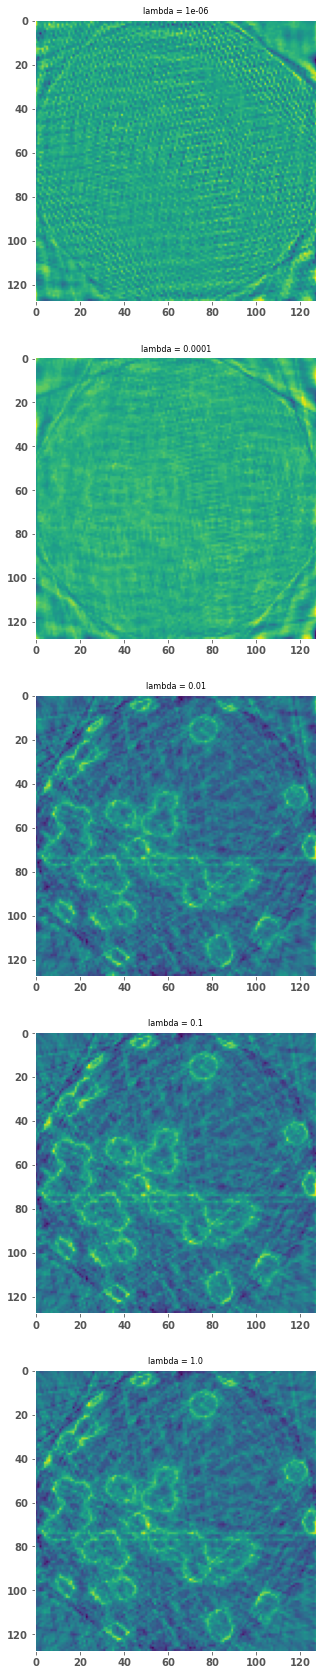

In [7]:
# initialize the lambda list
lambda_list = np.array([0.000001, 0.0001, 0.01, 0.1, 1])
coef_dict = {}

for i in range(len(lambda_list)):
    # instantiate the ridge regressor
    globals()["ridge_regressor_" + str(i + 1)] = Ridge(alpha = lambda_list[i])
    # fit the ridge regression according to the lambda list
    globals()["ridge_regressor_" + str(i + 1)].fit(X, Y)
    # print(globals()["ridge_regressor_" + str(i + 1)].coef_.shape)   # 1 * 16384
    # reshape the result with the corresponding name E.g. "ridge_regressor_1"
    coef_dict["ridge_regressor_" + str(i + 1)] = globals()["ridge_regressor_" + str(i + 1)].coef_.reshape(128,128)

# visualize the matrix
plt.style.use("ggplot")
fig, ax = plt.subplots(5,1, figsize = (150, 30))
plt.rcParams["font.weight"] = "bold"
for i in range(len(lambda_list)):
    ax[i].imshow(coef_dict["ridge_regressor_" + str(i + 1)])
    ax[i].grid(False)
    temp_title = "lambda = " + str(lambda_list[i])
    ax[i].set_title(temp_title, fontsize = 8)

We note that the last result with $\lambda = 1$ that is closest to the original image. The coefficients derived by $\lambda = 1$ is the best result. 

##### (b)

Since the loss function in sklearn is :$$\frac{1}{2n} * ||y - Xw||^2_2 + \alpha * ||w||_1$$, 
so the $$\alpha = \frac{1}{2n} \lambda.$$

/Users/kangshuoli/miniforge3/envs/eods-s22/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.792488050176113, tolerance: 2.937376465598964
  model = cd_fast.enet_coordinate_descent(
/Users/kangshuoli/miniforge3/envs/eods-s22/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.608613769026483, tolerance: 2.937376465598964
  model = cd_fast.enet_coordinate_descent(


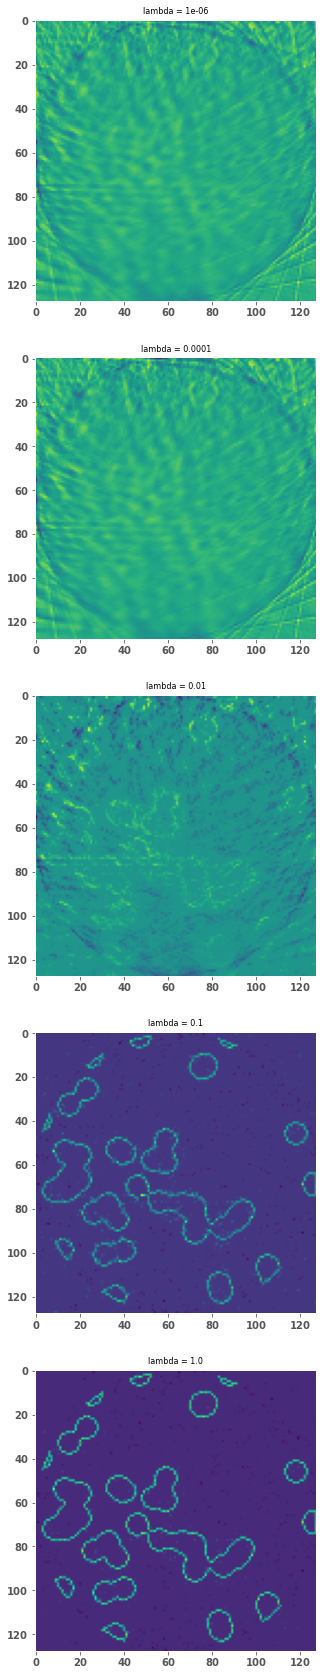

In [8]:
# try lasso regression

# generate alpha list 
alpha_list = (1 / (2 * X.shape[0])) * lambda_list

for i in range(len(lambda_list)):
    # instantiate the lasso regressor
    globals()["lasso_regressor_" + str(i + 1)] = Lasso(alpha = alpha_list[i])
    # fit the lasso regression according to the alpha list
    globals()["lasso_regressor_" + str(i + 1)].fit(X, Y)
    # reshape the result with the corresponding name E.g. "lasso_regressor_1"
    coef_dict["lasso_regressor_" + str(i + 1)] = globals()["lasso_regressor_" + str(i + 1)].coef_.reshape(128,128)

# visualize the matrix
# plt.style.use("ggplot")
fig, ax = plt.subplots(5,1, figsize = (150, 30))
for i in range(len(lambda_list)):
    ax[i].imshow(coef_dict["lasso_regressor_" + str(i + 1)])
    ax[i].grid(False)
    temp_title = "lambda = " + str(lambda_list[i])
    ax[i].set_title(temp_title, fontsize = 8)

In this plot, it is clear that the best result which is the most close to the original image is the subplot 5 with $\lambda = 1$. The coefficients with $\lambda = 1$ yields the best result. 

##### (c)

According to the two graphs above, the coefficients result of Lasso with $\lambda = 1$ is better than the coefficients from ridge regression with $\lambda = 1$, since the coefficients' image reconstructed from the Lasso is more close to the original image and it has a clear shape of those patterns. 